# What is a Decision Tree

A Decision Tree splits a dataset into smaller and smaller subsets using questions (conditions). The final subsets are called leaves, which give the prediction.

| Term                | Meaning                                                           |
| ------------------- | ----------------------------------------------------------------- |
| **Root Node**       | First feature-based split                                         |
| **Internal Node**   | A condition on a feature (e.g., “petal length > 2.5”)             |
| **Leaf Node**       | Final decision or prediction                                      |
| **Depth**           | Number of splits from root to leaf                                |
| **Split Criterion** | Function that evaluates how good a split is (e.g., Gini, Entropy) |


# Entropy in DT
Measurement of impurity or disorder in a data set
 $$ H(s)= - \sum_{i=1}^{c} p_i\log_{2}(p_i) $$

where
* $p_i$=proportion of class i
* c=Number of classes

#Information Gain
Information Gain measures the reduction in entropy after a dataset is split into features

$$ Information \; gain= H(s)-\sum_{i}^{k}\frac{|S_i|}{|S|}.H(S_i)$$
where
* $S_i$=subset created by split
* $H(S_i)$=entropy of subset $S_i$

# Gini Index
A way to measure how 'mixed' a group is.

For dataset with c classes and probability $p_i$ for each classes $$Gini(D)=1-\sum_{i=1}^{c}(p_i)$$
#Gini Vs Entropy
| Metric     | Formula                | Range         | Interpretation             |
| ---------- | ---------------------- | ------------- | -------------------------- |
| Entropy    | $-\sum p_i \log_2 p_i$ | \[0, log₂c]   | Info theory-based impurity |
| Gini Index | $1 - \sum p_i^2$       | \[0, 1 – 1/c] | Simpler impurity measure   |

#Example of use

| StudyTime | Attendance | AssignmentDone | Result |
| --------- | ---------- | -------------- | ------ |
| High      | Good       | Yes            | Pass   |
| High      | Poor       | Yes            | Pass   |
| Medium    | Good       | No             | Fail   |
| Medium    | Good       | Yes            | Pass   |
| Low       | Poor       | No             | Fail   |
| Low       | Good       | Yes            | Fail   |
| Low       | Poor       | No             | Fail   |
| Medium    | Poor       | Yes            | Fail   |

---

## Step 1: Gini Index of the Root Node

We have:

- 3 "Pass"
- 5 "Fail"

$$
Gini_{root} = 1 - \left(\frac{3}{8}\right)^2 - \left(\frac{5}{8}\right)^2 = 1 - \frac{9}{64} - \frac{25}{64} = \frac{30}{64} = 0.46875
$$

---

##  Step 2: Gini Index for Split on `StudyTime`

###  StudyTime = High

2 samples → Pass, Pass

$$
Gini_{High} = 1 - \left(\frac{2}{2}\right)^2 = 0
$$

###  StudyTime = Medium
3 samples → Pass, Fail, Fail

$$
Gini_{Medium} = 1 - \left(\frac{1}{3}\right)^2 - \left(\frac{2}{3}\right)^2 = 1 - \frac{1}{9} - \frac{4}{9} = \frac{4}{9} \approx 0.444
$$

###  StudyTime = Low

3 samples → Fail, Fail, Fail

$$
Gini_{Low} = 1 - \left(\frac{3}{3}\right)^2 = 0
$$

###  Weighted Gini

$$
Gini_{StudyTime} = \frac{2}{8}(0) + \frac{3}{8}(0.444) + \frac{3}{8}(0) = 0.1665
$$

---

##  Step 3: Gini Index for Split on `Attendance`

- Good: 4 samples → Pass, Fail, Pass, Fail
- Poor: 4 samples → Pass, Fail, Fail, Fail

### Good

$$
Gini_{Good} = 1 - \left(\frac{2}{4}\right)^2 - \left(\frac{2}{4}\right)^2 = 1 - 0.25 - 0.25 = 0.5
$$

### Poor

$$
Gini_{Poor} = 1 - \left(\frac{1}{4}\right)^2 - \left(\frac{3}{4}\right)^2 = 1 - 0.0625 - 0.5625 = 0.375
$$

###  Weighted Gini

$$
Gini_{Attendance} = \frac{4}{8}(0.5) + \frac{4}{8}(0.375) = 0.4375
$$

---

##  Step 4: Gini Index for Split on `AssignmentDone`

- Yes: 5 samples → Pass, Pass, Pass, Fail, Fail
- No: 3 samples → Fail, Fail, Fail

### Yes

$$
Gini_{Yes} = 1 - \left(\frac{3}{5}\right)^2 - \left(\frac{2}{5}\right)^2 = 1 - 0.36 - 0.16 = 0.48
$$

### No

$$
Gini_{No} = 1 - \left(\frac{3}{3}\right)^2 = 0
$$

### Weighted Gini

$$
Gini_{AssignmentDone} = \frac{5}{8}(0.48) + \frac{3}{8}(0) = 0.3
$$

---

##  Final Comparison

| Feature         | Gini Index |
|----------------|------------|
| StudyTime       | **0.1665** |
| AssignmentDone  | 0.3        |
| Attendance      | 0.4375     |

** Best Split** = `StudyTime`

            [StudyTime]
           /     |     \
       High   Medium   Low
       (0)    (0.444)   (0)
     Pass     Split    Fail



can be extended further splits from `Medium` group using the same method.
## Expand Medium Group Further

 Splitting on `Attendance` (for `StudyTime = Medium`)

We are now focusing only on the subset where:
The data is:

| Attendance | AssignmentDone | Result |
|------------|----------------|--------|
| Good       | No             | Fail   |
| Good       | Yes            | Pass   |
| Poor       | Yes            | Fail   |

---

###  Gini Index for Each Group

####  For `Attendance = Good` (2 samples: 1 Pass, 1 Fail)

$$
\text{Gini}_{\text{Good}} = 1 - \left(\frac{1}{2}\right)^2 - \left(\frac{1}{2}\right)^2 = 1 - 0.25 - 0.25 = 0.5
$$

####  For `Attendance = Poor` (1 sample: 1 Fail)

$$
\text{Gini}_{\text{Poor}} = 1 - (0)^2 - (1)^2 = 0
$$

---

###  Weighted Gini Index for the Split:

$$
\text{Gini}_{\text{split}} = \frac{2}{3} \cdot 0.5 + \frac{1}{3} \cdot 0 = \frac{1}{3} \approx 0.333
$$

---



Splitting the `Medium` group by `Attendance` yields a **Gini index of 0.333**, making it a **better split than no split**

        [StudyTime] (Gini = 0.444)
          /      |      \
     High(0)  Medium(0.444)  Low(0)
      /           |           \
    Pass     [Attendance]      Fail
                 /    \
        Good(0.5)     Poor(0)
           /   \
      No → Fail  Yes → Pass


### Further Split: `Attendance` within `StudyTime = Medium`

Records:
- Good: 2 students → 1 Pass, 1 Fail
- Poor: 1 student → 1 Fail

#### ▸ `Attendance = Good`:

$$Gini = 1 - \left(\frac{1}{2}\right)^2 - \left(\frac{1}{2}\right)^2 = 0.5
$$

####  `Attendance = Poor`:

$$Gini = 1 - \left(\frac{1}{1}\right)^2 = 0
$$

#### Weighted Gini:

$$Gini = \frac{2}{3} \cdot 0.5 + \frac{1}{3} \cdot 0 = \frac{1}{3} \approx 0.333
$$


                [StudyTime] (0.444)
                 /    |     \
            High(0) Medium(0.444) Low(0)
              |        |         |
           Pass  [Attendance]   Fail
                      /  \
               Good(0.5)  Poor(0)
                 /    \
    AssignmentDone   AssignmentDone
          No             Yes
         Fail           Pass


# Plotting Decision tree for irish data

Text(0.5, 1.0, 'Decision Tree on Iris Dataset')

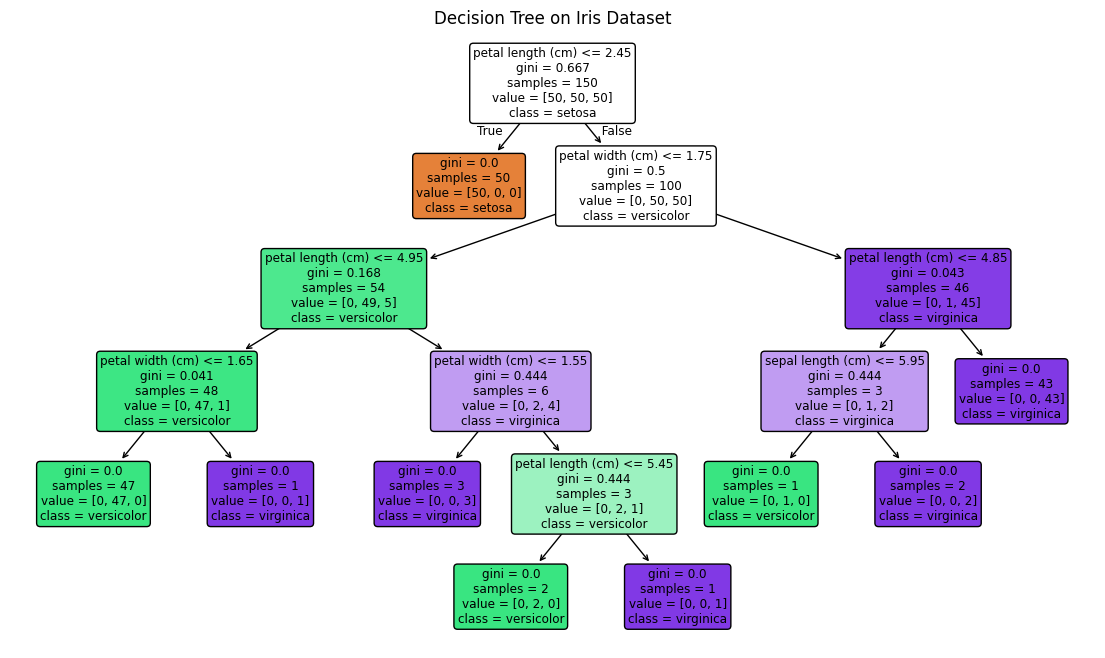

In [ ]:


from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
import pandas as pd

# Load data
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
class_names = iris.target_names
df=pd.DataFrame(data=X,columns=feature_names)
df['class']=y
df.head(1000)
# Train Decision Tree
clf = DecisionTreeClassifier(criterion='gini', random_state=42)
clf.fit(X, y)

# Plot the tree
plt.figure(figsize=(14, 8))
plot_tree(clf,
          feature_names=feature_names,
          class_names=class_names,
          filled=True,
          rounded=True)
plt.title("Decision Tree on Iris Dataset")




##  Decision Tree (Gini) on Iris Dataset

The decision tree shown above is trained on the Iris dataset using the **Gini index** as the splitting criterion.

---

###  Why the First Split is `petal length (cm) ≤ 2.45`

This threshold was **not manually set** — it was automatically chosen by the decision tree algorithm to maximize **class purity**.

- In the Iris dataset:
  - All **Setosa** flowers have petal lengths ≤ 1.9 cm
  - All **Versicolor** and **Virginica** flowers have petal lengths > 2.0 cm
- The split at **2.45 cm** perfectly separates Setosa from the other two species

Thus, the left branch becomes **pure Setosa** (Gini = 0), and the right branch contains a mix of Versicolor and Virginica.

---

### Interpretation of the Root Node

```text
petal length (cm) ≤ 2.45
gini = 0.667
samples = 150
value = [50, 50, 50]
class = setosa


## Prediction of irish data

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from  sklearn.model_selection import train_test_split,cross_validate, GridSearchCV
from sklearn import datasets
import numpy as np
iris_data = datasets.load_iris()
features = iris_data.data
target = iris_data.target

feature_train,feature_test,target_train,target_test = train_test_split(features,target,test_size=0.2, random_state=42)

model = DecisionTreeClassifier(criterion='entropy')
predicted = cross_validate(model, features, target,cv=10)
#print(pd.DataFrame(predicted).head())
print(np.mean(predicted['test_score']))


0.9533333333333334


# Parameter tuning: max_depth

In [ ]:
param_grid={'max_depth':np.arange(1,10)}
model = DecisionTreeClassifier(criterion='entropy')
feature_train,feature_test,target_train,target_test = train_test_split(features,target,test_size=0.2, random_state=42)

tree = GridSearchCV(DecisionTreeClassifier(),param_grid)

tree.fit(feature_train, target_train)
print(tree.best_params_)
grid_prediction = tree.predict(feature_test)
print(grid_prediction)

{'max_depth': np.int64(8)}
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


##  GridSearchCV Outcome Explanation

The model selected `max_depth = 8` as the best-performing depth.  
This means a tree with 8 levels provided the highest validation accuracy during cross-validation.

### Why `max_depth` Matters:
- **Too small** (shallow tree): Underfits → misses key patterns
- **Too large** (deep tree): Overfits → memorizes noise

By tuning `max_depth`, we balance **bias and variance** — leading to better generalization on unseen data.  
The predicted array shows the model now uses this optimal depth to classify the test set accurately.


[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
1.0


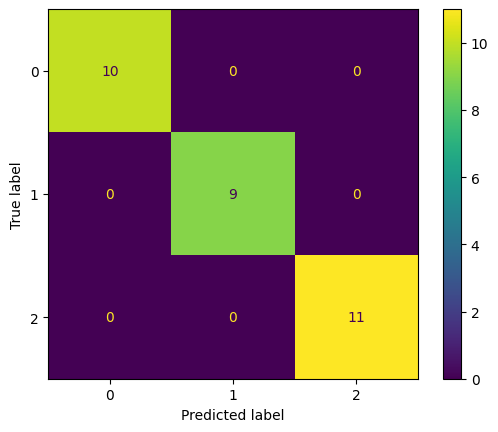

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,accuracy_score

print(confusion_matrix(target_test,grid_prediction))
ConfusionMatrixDisplay.from_predictions(target_test,grid_prediction)
print(accuracy_score(target_test,grid_prediction))

#Exercise: Predicting Breast Cancer





In [ ]:
from sklearn.datasets import load_breast_cancer

breast_cancer = load_breast_cancer()
X = breast_cancer.data
y= breast_cancer.target

df = pd.DataFrame(data=X,columns=breast_cancer.feature_names)

df['target']=breast_cancer.target
df['target name']=df['target'].map(lambda x:breast_cancer.target_names[x])
df.head(100)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target,target name
0,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.147100,0.2419,0.07871,...,184.60,2019.0,0.1622,0.66560,0.71190,0.26540,0.4601,0.11890,0,malignant
1,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,0.1812,0.05667,...,158.80,1956.0,0.1238,0.18660,0.24160,0.18600,0.2750,0.08902,0,malignant
2,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,0.2069,0.05999,...,152.50,1709.0,0.1444,0.42450,0.45040,0.24300,0.3613,0.08758,0,malignant
3,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,0.2597,0.09744,...,98.87,567.7,0.2098,0.86630,0.68690,0.25750,0.6638,0.17300,0,malignant
4,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,0.1809,0.05883,...,152.20,1575.0,0.1374,0.20500,0.40000,0.16250,0.2364,0.07678,0,malignant
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,20.260,23.03,132.40,1264.0,0.09078,0.13130,0.146500,0.086830,0.2095,0.05649,...,156.10,1750.0,0.1190,0.35390,0.40980,0.15730,0.3689,0.08368,0,malignant
96,12.180,17.84,77.79,451.1,0.10450,0.07057,0.024900,0.029410,0.1900,0.06635,...,82.14,495.2,0.1140,0.09358,0.04980,0.05882,0.2227,0.07376,1,benign
97,9.787,19.94,62.11,294.5,0.10240,0.05301,0.006829,0.007937,0.1350,0.06890,...,68.81,366.1,0.1316,0.09473,0.02049,0.02381,0.1934,0.08988,1,benign
98,11.600,12.84,74.34,412.6,0.08983,0.07525,0.041960,0.033500,0.1620,0.06582,...,82.96,512.5,0.1431,0.18510,0.19220,0.08449,0.2772,0.08756,1,benign


In [ ]:
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
param_grid={'max_depth':np.arange(1,10),'criterion':['gini','entropy']}
model=DecisionTreeClassifier()
tree = GridSearchCV(model,param_grid)
tree.fit(X_train,y_train)
print(tree.best_estimator_,tree.best_params_)



DecisionTreeClassifier(criterion='entropy', max_depth=np.int64(4)) {'criterion': 'entropy', 'max_depth': np.int64(4)}


In [ ]:
y_pred = tree.predict(X_test)

confusion_matrix(y_pred,y_test)
accuracy_score(y_pred,y_test)

0.956140350877193